# Preliminaries
<a href="https://colab.research.google.com/github/cwf2/dices-mta/blob/main/Mother%20speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import statements

In [1]:
import os
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import HTML

### Data paths

In [2]:
local_data = "data"
local_figs = "figs"
remote_data = "https://github.com/cwf2/dices-book-mummy/raw/main/data/"
data_files = ["merged.csv", "mother-child.csv", "mother_diction.csv"]

### Customize figures for book publication

This flag triggers some tweaks to the images required by the book publisher. Set it to false for regular use.

In [3]:
BOOK_EXPORT = True

### Proprietary font - for the book figures only

In [4]:
# specific to Christopher's Mac
font_path = "/Library/Fonts/Brill-Roman.ttf"

# change default font for pyplot
if BOOK_EXPORT:
    from matplotlib import font_manager
    
    try:
        font_path = "/Library/Fonts/Brill-Roman.ttf"
        font_manager.fontManager.addfont(font_path)
        font_name = font_manager.FontProperties(fname=font_path).get_name()
    except:
        print(f"Failed to load {font_path}")
        font_name = "sans serif"

    plt.rcParams['font.family'] = font_name

### Download remote data

In [5]:
if not os.path.exists(local_data):
    os.mkdir(local_data)
for filename in data_files:
    if not os.path.exists(os.path.join(local_data, filename)):
        print(f'downloading {filename}')
        res = requests.get(remote_data + filename, json={"download":""})
        if not res.ok:
            res.raise_for_status()
        with open(os.path.join(local_data, filename), 'wb') as f:
            f.write(res.content)

## Load data

### token table

In [6]:
tokens_file = os.path.join(local_data, 'merged.csv')
tokens = pd.read_csv(tokens_file, dtype=str)
display(tokens)

,speech_id,lang,author,work,urn,l_fi,l_la,nlines,spkr,addr,...,mood_cltk,tense_cltk,voice_cltk,aspect,person_cltk,number_cltk,case_cltk,gender_cltk,degree_cltk,verbform_cltk
0,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,NaN,NaN,plural,nominative,masculine,NaN,NaN
4,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,NaN,NaN,plural,vocative,masculine,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384379,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,NaN,NaN,NaN,NaN,NaN,plural,dative,feminine,NaN,NaN
384380,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,NaN,NaN,NaN,NaN,NaN,singular,accusative,feminine,NaN,NaN
384381,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,subjunctive,present,active,imperfective,third,singular,NaN,NaN,NaN,finite
384382,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,NaN,NaN,passive,perfective,NaN,plural,nominative,neuter,NaN,participle


#### For book only: harmonize spelling of Vergil's name

In [7]:
if BOOK_EXPORT:
    tokens.loc[tokens["author"]=="Virgil", "author"] = "Vergil"

### List of mother-child pairs

In [8]:
mothers_file = os.path.join(local_data, 'mother-child.csv')
mothers = pd.read_csv(mothers_file, sep='\t')
display(mothers)

,spkr,addr
0,Alcimede,Jason
1,Aphrodite,Eros
2,Aura (nymph),children of Aura
3,Chalciope,Argus (son of Phrixus)
4,Chalciope,sons of Phrixus
5,Chariclo,Tiresias
6,Leto,Apollo
7,Ceres,Proserpina
8,Cybele,Ceres
9,Venus,Cupid


### Identify mother speeches

This custom function checks the speaker and addressee instances of a speech against the list of mother-child pairs.

In [9]:
def motherValidation(rec):
    '''check whether any speaker-addressee combo is in the mother-child list'''
    valid_keys = list(mothers.spkr + ':' + mothers.addr)

    if rec['spkr'] is np.NaN:
        return False
    if rec['addr'] is np.NaN:
        return False

    for spkr in str(rec['spkr']).split(','):
        for addr in str(rec['addr']).split(','):
            key = f'{spkr}:{addr}'
            if key in valid_keys:
                return True

    return False

#### Add `mother` column

Add boolean mother flag to the token table

In [10]:
# validate mother-child pairs by speech instead of by token
by_speech = tokens.groupby(['spkr', 'addr'], sort=False).first().reset_index()
by_speech['mother'] = by_speech.apply(motherValidation, axis=1)

# apply results to the whole table
tokens = tokens.merge(by_speech[['spkr', 'addr', 'mother']], on=['spkr', 'addr'], how='left')

#### How many mother speeches?

In [11]:
tokens.groupby('speech_id').agg(speech_id=('speech_id', 'first'), mother=('mother', 'first')).groupby('mother').agg(count=('speech_id', 'count'))

,count
mother,
False,4030
True,94


## Hand-selected feature sets

In [12]:
class_file = os.path.join(local_data, 'mother_diction.csv')
lemma_class = pd.read_csv(class_file)

In [13]:
lem_dict = dict()

for label in lemma_class.label.unique():
    if not pd.isna(label):
        lem_dict[label] = [lem.lower() for lem in lemma_class.loc[lemma_class.label == label, 'lemma'].values]
        print(label, ':', sep="")
        print(*lem_dict[label], sep=" ")
        print()

family:
'nate altricus altrix avus auus coniunx coniux filius frater frater fraterque gemina genetrix genitor genus infans mater matr maternus matrisque nao nascor nata nate natus no parens pario partus pater paternus patriosque patrius patruum pietas proavum progeo proles puer soror spons αἶμαι ἄλοχος ἀμήτωρ γάμος γάμος γαστήρ γεῖνος γενέθλη γενέθλα γενετήρ γενέτης γενέτη γένος γλάγος γονεύς γόνος εἰλείθυια ἐννεάκυκλος θάλος θυγάτηρ θύγατρα κασιγνήτης κόρη κόρος κούρη κοῦρε κοῦρος λοχεία λοχέια λοχεύω λωχεύω μητερός μήτηρ μῆτηρ μητρυιά μογόστοκος μόγοστοκος νύμφη νύμφη νυμφίε νυμφίον νυμφίος ὁμογάστριον παῖδες παῖδος παῖς πατήρ πατή πατρόφονος πατρώιος πατρῷος προπάτωρ τέκνον τέκνον τέκος τίκτω τοκετοῖος τοκεύς τοκῆος τόκος υἱός υἷος φίλη φίλος ὠδίν ὠδίνω ὠδίς

pers_1s:
ego egomet egomo me me mears mecus meitus mene meus miho γώ ἐγὠ ἐγώ ἐγὼ ἐγῶ ἔγω ἐμοῖ ἐμοῖο ἐμὀν ἐμός μ

pers_1p:
nobis nosne noster nosteriquus nostr nostra nostraeue nostrane nostrasne nostrive nostrus ἧμας ἦμεις ἡμεῖ

#### Add additional classification columns

In [14]:
# add columns for the hand-marked features
for tag in ['family', 'pers_1s', 'pers_2s']:
    tokens[tag] = tokens['lemma_spacy'].isin(lem_dict[tag]) | tokens['lemma_cltk'].isin(lem_dict[tag])

tokens['interrog'] = tokens['lemma_spacy'].isin(lem_dict['interrog'])

# combine first and second person singular personal pronouns and possessives
tokens['pers'] = (tokens['pers_1s'] | tokens['pers_2s'])

# imperatives
tokens['imper'] = (tokens['mood_cltk'] == 'imperative') | (tokens['mood_spacy'] == 'Imp')

In [15]:
display(tokens)

,speech_id,lang,author,work,urn,l_fi,l_la,nlines,spkr,addr,...,gender_cltk,degree_cltk,verbform_cltk,mother,family,pers_1s,pers_2s,interrog,pers,imper
0,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,False,False,False,False,False,False,False
1,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,False,False,False,False,False,False,False
2,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,NaN,NaN,NaN,False,False,False,False,False,False,False
3,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,masculine,NaN,NaN,False,False,False,False,False,False,False
4,1,greek,Homer,Iliad,urn:cts:greekLit:tlg0012.tlg001.perseus-grc2,1.17,1.21,5,Chryses,"Agamemnon,Greeks",...,masculine,NaN,NaN,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384379,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,feminine,NaN,NaN,False,False,False,False,False,False,False
384380,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,feminine,NaN,NaN,False,False,False,False,False,False,False
384381,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,NaN,NaN,finite,False,False,False,False,False,False,False
384382,4696,latin,Prudentius,Psychomachia,urn:cts:latinLit:stoa0238.stoa002.perseus-lat2,1.799,1.822,24,Fides,Virtues,...,neuter,NaN,participle,False,False,False,False,False,False,False


# Analysis

### difference of proportions

Rank all lemmas by their pertinence to the "mother" class using the difference of their frequencies in the two classes.

In [16]:
def rankFeatures(col, top=None):
    # freq in non-mother speeches
    freq_others = tokens.loc[~tokens['mother']].groupby(col).size().reset_index(name='count')
    freq_others['freq'] = 1000 * freq_others['count'].div(freq_others['count'].sum())

    # freq in mother speeches
    freq_mother = tokens.loc[tokens['mother']].groupby(col).size().reset_index(name='count')
    freq_mother['freq'] = 1000 * freq_mother['count'].div(freq_mother['count'].sum())

    # merge the two tables, so we have mother, non-mother freqs for each feature
    x = freq_others.merge(freq_mother, on=col, suffixes=('_others', '_mother'))

    # calculate difference
    x['freq_diff'] = x['freq_mother'] - x['freq_others']
    x = x.sort_values('freq_diff', ascending=False)

    # optionally select just the top ranked results
    if top is not None:
        x = x[:top]

    # map the hand-picked feature classes onto the results where applicable
    x = x.merge(lemma_class.rename(columns={'lemma':col}), on=col, how='left')

    # reorganize the table to show calculations
    x = x[[col, "count_mother", "count_others", "freq_mother", "freq_others", "freq_diff", "label"]]

    return(x)

In [17]:
rankFeatures('lemma_spacy', 10)

,lemma_spacy,count_mother,count_others,freq_mother,freq_others,freq_diff,label
0,?,116,2120,12.259565,5.659385,6.600179,interrog
1,tu,96,1931,10.145847,5.154846,4.991001,pers_2s
2,τέκνον,40,105,4.227436,0.280300,3.947136,family
3,σύ,113,3232,11.942507,8.627893,3.314614,pers_2s
4,ἐμός,44,830,4.650180,2.215703,2.434477,pers_1s
5,mater,27,215,2.853519,0.573947,2.279572,family
6,hic,76,2195,8.032129,5.859599,2.172529,NaN
7,quis,37,866,3.910378,2.311805,1.598573,NaN
8,καί,173,6261,18.283661,16.713873,1.569788,NaN
9,ego,63,1934,6.658212,5.162854,1.495358,pers_1s


In [18]:
rankFeatures('lemma_cltk', 10)

,lemma_cltk,count_mother,count_others,freq_mother,freq_others,freq_diff,label
0,?,114,2101,12.398042,5.778058,6.619985,interrog
1,tu,93,1851,10.114192,5.090521,5.023671,pers_2s
2,σύ,110,3149,11.963023,8.660211,3.302812,pers_2s
3,τέκνον,25,94,2.718869,0.258514,2.460355,family
4,ἐμός,43,830,4.676455,2.282622,2.393833,pers_1s
5,mater,26,192,2.827624,0.528028,2.299596,family
6,hic,75,2164,8.156607,5.951317,2.205290,NaN
7,nascor,28,342,3.045133,0.940550,2.104583,family
8,ego,70,2130,7.612833,5.857812,1.755021,pers_1s
9,καί,172,6244,18.705818,17.171914,1.533904,NaN


## visualize frequency differences

In [19]:
def visFreqHeatMap(col, offsets={}):
    '''Create a visualization based on either `lemma_spacy` or `lemma_cltk`'''
    
    # total tokens, used in calculating frequencies
    total_others = tokens.loc[~tokens["mother"]].groupby(col).size().sum()
    total_mother = tokens.loc[tokens["mother"]].groupby(col).size().sum()

    # token counts
    ranked = rankFeatures(col)

    # frequencies to iterate over
    x_vals = np.arange(0, ranked["freq_mother"].max() + 1, 0.1)
    y_vals = np.arange(0, ranked["freq_mother"].max(), 0.1)

    # generate heatmap
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X - Y

    # create figure
    fig, ax = plt.subplots(figsize=(8,6))
    cs = ax.contourf(X, Y, Z, levels=20, cmap='coolwarm')
    
    # add titles, legend
    if "cltk" in col:
        ax.set_title("Top CLTK lemmata by frequency difference in mother speeches")
    else:
        ax.set_title("Top spaCy lemmata by frequency difference in mother speeches")
    ax.set_xlabel("freq. mother (per 1000 tokens)")
    ax.set_ylabel("freq. others (per 1000 tokens)")
    cbar = fig.colorbar(cs, label="freq. diff. (per 1000 tokens)")
    
    # add individual token frequencies
    for _, row in ranked.loc[:10,].iterrows():

        # add point
        ax.scatter(
            x = row["freq_mother"],
            y = row["freq_others"],
            color = "black",
            s = 5
        )
        
        # add label
        ax.annotate(
            xy = (row["freq_mother"], row["freq_others"]), 
            text = row[col],
            xytext = offsets.get(row[col], (0.5, -0.5)),
            textcoords = "offset fontsize",
        )

    return fig

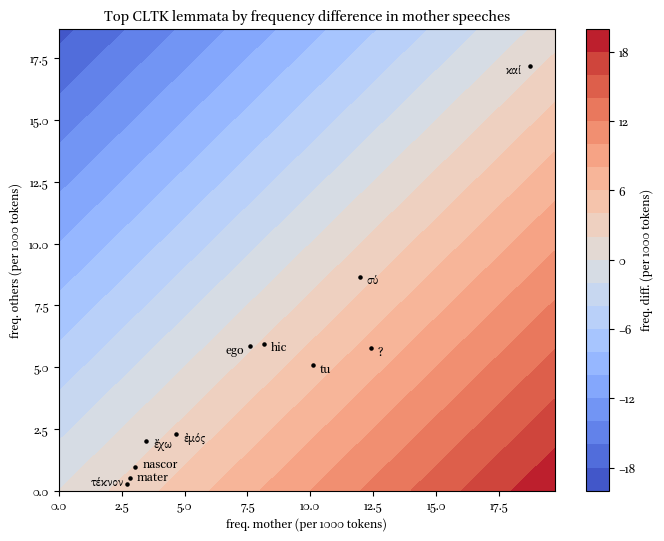

In [20]:
# customization of figure for publication
if BOOK_EXPORT:
    custom_offsets = {
        "ego": (-1.8, -0.5),
        "nascor": (0.5, -0),
        "mater": (0.5, -0.2),
        "τέκνον": (-2.6, -0.1),
        "καί": (-1.7, -0.5),
    }

    fig = visFreqHeatMap("lemma_cltk", offsets=custom_offsets)

    # export
    fig.savefig(
        fname = os.path.join(local_figs, "Fig_1-CLTK_lemma_heatmap.pdf"),
        dpi = 300
    )

# generic visualization
else:
    visFreqHeatMap("lemma_cltk")

## rolling window of 5 lines

In [21]:
results = []
for label, group in tokens.groupby('speech_id'):
    df = group.groupby('line_id', sort=False).agg(
        author = ('author', 'first'),
        work = ('work', 'first'),
        l_fi = ('l_fi', 'first'),
        l_la = ('l_la', 'first'),
        spkr = ('spkr', 'first'),
        addr = ('addr', 'first'),
        mother = ('mother', 'first'),
        tokens = ('token_spacy', 'count'),
        imper = ('imper', 'sum'),
        family = ('family', 'sum'),
        pers = ('pers', 'sum'),
        interrog = ('interrog', 'sum'),
    )
    results.append(
        pd.DataFrame(dict(
            speech_id = label,
            author = df['author'],
            work = df['work'],
            l_fi = df['l_fi'],
            l_la = df['l_la'],
            spkr = df['spkr'],
            addr = df['addr'],
            mother = df['mother'],
            lines = df['tokens'].rolling(window=5, min_periods=1, center=True).count(),
            tokens = df['tokens'].rolling(window=5, min_periods=1, center=True).sum(),
            family = df['family'].rolling(window=5, min_periods=1, center=True).sum(),
            imper = df['imper'].rolling(window=5, min_periods=1, center=True).sum(),
            pers = df['pers'].rolling(window=5, min_periods=1, center=True).sum(),
            interrog = df['interrog'].rolling(window=5, min_periods=1, center=True).sum(),
        ))
    )
results = pd.concat(results)
results['imper_norm'] = results['imper'].div(results['tokens'])
results['family_norm'] = results['family'].div(results['tokens'])
results['pers_norm'] = results['pers'].div(results['tokens'])
results['interrog_norm'] = results['interrog'].div(results['tokens'])

results['comp'] = results['imper'] + results['family'] + results['pers'] + results['interrog']
results['comp_norm'] = results['comp'].div(results['tokens'])

### Top speeches by max composite score

In [22]:
x = results.groupby('speech_id', sort=False).agg(
    author = ('author', 'first'),
    work = ('work', 'first'),
    l_fi = ('l_fi', 'first'),
    l_la = ('l_la', 'first'),
    spkr = ('spkr', 'first'),
    addr = ('addr', 'first'),
    mother = ('mother', 'first'),
    lines = ('tokens', 'count'),
    tokens = ('tokens', 'sum'),
    comp_avg = ('comp', 'mean'),
    comp_sum = ('comp', 'sum'),
    comp_max = ('comp', 'max'),
)
x['loc'] = x['l_fi'] + '-' + x['l_la']
x['comp_norm'] = x['comp_sum'] / x['tokens']
x = x.sort_values('comp_max', ascending=False)
x.query('comp_max>12')

,author,work,l_fi,l_la,spkr,addr,mother,lines,tokens,comp_avg,comp_sum,comp_max,loc,comp_norm
speech_id,,,,,,,,,,,,,,
3669,Nonnus,Dionysiaca,48.832,48.847,Artemis,Aura (nymph),False,16,512.0,8.687500,139.0,18.0,48.832-48.847,0.271484
1758,Vergil,Aeneid,9.481,9.497,mother of Euryalus (son of Opheltes),"Euryalus (son of Opheltes),Jupiter,Rutulians",True,17,622.0,9.294118,158.0,18.0,9.481-9.497,0.254019
3216,Statius,Thebaid,10.690,10.718,Creon,Menoeceus,False,29,1095.0,7.275862,211.0,16.0,10.690-10.718,0.192694
3374,Nonnus,Dionysiaca,10.129,10.136,Semele,Semele,False,8,223.0,9.250000,74.0,15.0,10.129-10.136,0.331839
3375,Nonnus,Dionysiaca,10.196,10.216,Dionysus,Ampelus,False,21,733.0,7.857143,165.0,15.0,10.196-10.216,0.225102
4319,Ps.-Oppian,Cynegetica,3.220,3.233,donkey mother,"donkey child,donkey mother",True,14,430.0,8.071429,113.0,14.0,3.220-3.233,0.262791
4632,Claudian,Epithalamium de Nuptiis Honorii Augusti,1.20,1.46,Honorius,Honorius,False,27,871.0,5.925926,160.0,14.0,1.20-1.46,0.183697
2208,Ovid,Metamorphoses,10.320,10.355,Myrrha,Myrrha,False,36,1354.0,6.027778,217.0,14.0,10.320-10.355,0.160266
4553,Eudocia,Homerocentones,2059,2064,Maria,Jesus,True,6,206.0,10.500000,63.0,14.0,2059-2064,0.305825


### max scores of mother speeches

In [23]:
x.loc[x['mother']].query("comp_max<5")

,author,work,l_fi,l_la,spkr,addr,mother,lines,tokens,comp_avg,comp_sum,comp_max,loc,comp_norm
speech_id,,,,,,,,,,,,,,
505,Homer,Iliad,19.8,19.11,Thetis,Achilles,True,4,104.0,3.500000,14.0,4.0,19.8-19.11,0.134615
4275,Colluthus,Rape of Helen,86,98,Aphrodite,Erotes,True,13,399.0,2.615385,34.0,4.0,86-98,0.085213
4257,Theocritus,Idylls,24.7,24.9,Alcmene,"Heracles,Iphicles",True,3,60.0,4.000000,12.0,4.0,24.7-24.9,0.200000
1324,Homer,Odyssey,23.105,23.110,Penelope,Telemachus,True,6,189.0,2.833333,17.0,4.0,23.105-23.110,0.089947
1373,Hesiod,Theogony,164,166,Gaia,children of Gaia,True,3,60.0,4.000000,12.0,4.0,164-166,0.200000
129,Homer,Iliad,5.373,5.374,Dione,Aphrodite,True,2,32.0,4.000000,8.0,4.0,5.373-5.374,0.250000
1536,Vergil,Aeneid,1.321,1.324,Venus-huntress,"Achates,Aeneas",True,4,91.0,3.250000,13.0,4.0,1.321-1.324,0.142857
2071,Ovid,Metamorphoses,6.206,6.213,Latona,"Apollo,Diana",True,8,254.0,2.875000,23.0,4.0,6.206-6.213,0.090551
4677,Claudian,De Raptu Proserpinae,3.1.133,3.1.136,Cybele,Ceres,True,4,106.0,2.250000,9.0,3.0,3.1.133-3.1.136,0.084906


### distribution of scores

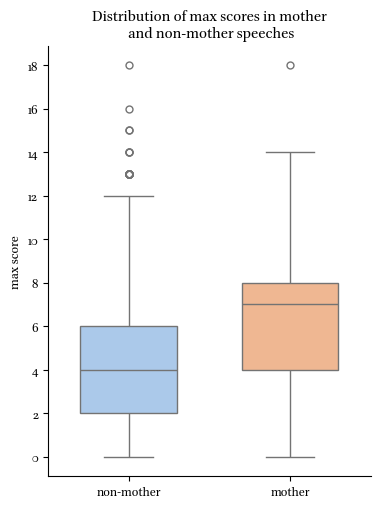

In [24]:
from matplotlib.ticker import MultipleLocator

g = sns.catplot(
    data = x,
    y = 'comp_max',
    x = 'mother',
    hue = "mother",
    kind = "box",
    width = 0.6,
    legend = False,
    height = 5,
    aspect = .8,
    palette = "pastel",
)
g.ax.set_title("Distribution of max scores in mother\n and non-mother speeches")
g.ax.set_ylabel("max score")
g.ax.set_xlabel("")
g.ax.set_xticks([False, True], ["non-mother", "mother"])
g.ax.yaxis.set_major_locator(MultipleLocator(2))

if BOOK_EXPORT:    
    # export
    g.savefig(
        fname = os.path.join(local_figs, "Fig_2-scores_boxplot.pdf"),
        dpi = 300,
    )

#### Distribution by author - not used in the book

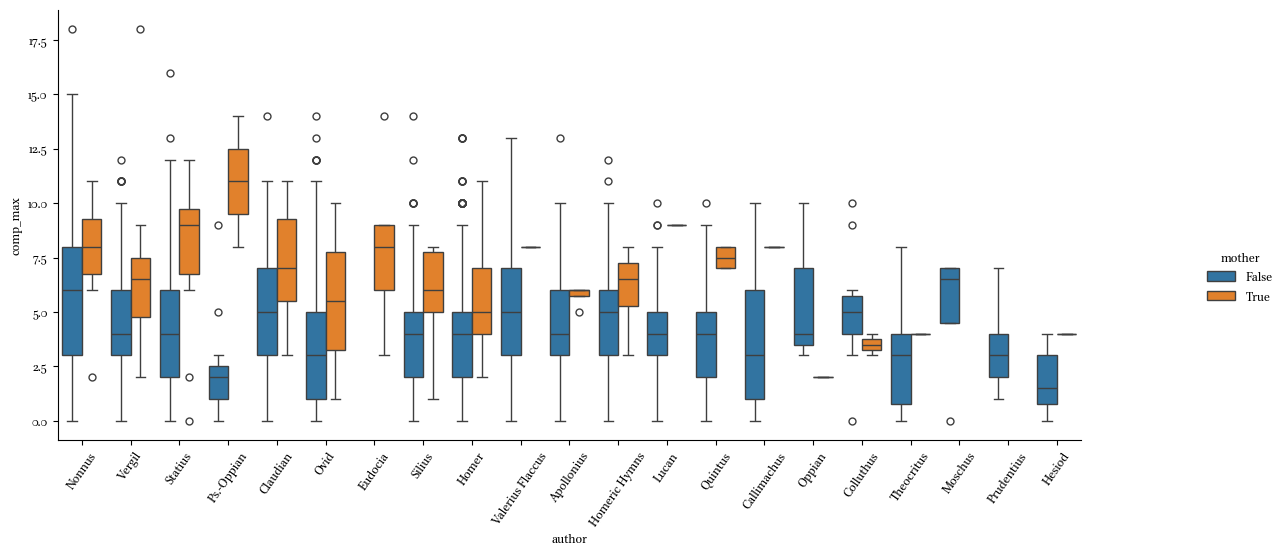

In [25]:
g = sns.catplot(data=x, y='comp_max', x='author', hue='mother', kind='box', dodge=True)
g.fig.set_figwidth(14)
g.ax.tick_params(axis="x", rotation=55)

## plot individual speeches

In [54]:
plt.rcParams["text.usetex"] = False

def linePlot(speech_id):
    mask = results['speech_id']==speech_id
    ys = results.loc[mask, 'comp']

    _, l_fi = ys.index.values[0].rsplit(':', 1)
    _, l_la = ys.index.values[-1].rsplit(':', 1)
    author = results.loc[mask, 'author'].iloc[0]
    work = results.loc[mask, 'work'].iloc[0]
    title = f"{author} {work} {l_fi}-{l_la}"

    if '.' in l_fi:
        _, l_fi = l_fi.rsplit('.', 1)
    l_fi = int(l_fi)
    xs = np.arange(l_fi, l_fi+len(ys))

    avg = results['comp'].median()

    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(xs, ys)
    ax.axhline(avg, color=sns.light_palette('#79C')[3], ls='--')
    ax.set_ylabel('rolling composite score')
    ax.set_xlabel('line')
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.set_ylim((0,20))
    ax.set_title(title)
    ax.set_fontsize(11)
    plt.close(fig)
    return fig

def stackPlot(speech_id):
    mask = results['speech_id']==speech_id
    cols = ['family', 'imper', 'pers', 'interrog']
    df = results.loc[mask, cols]
    _, l_fi = df.index.values[0].rsplit(':', 1)
    _, l_la = df.index.values[-1].rsplit(':', 1)
    author = results.loc[mask, 'author'].iloc[0]
    work = results.loc[mask, 'work'].iloc[0]

    l_range = f"{l_fi}-{l_la}"
    if '.' in l_fi:
        pref_fi, l_fi = l_fi.rsplit('.', 1)

        if '.' in l_la:
            pref_la, l_la = l_la.rsplit('.', 1)

            if pref_fi == pref_la:
                l_range = f"{pref_fi}.{l_fi}-{l_la}"

    title = f"{author} {work} {l_range}"
    
    l_fi = int(l_fi)
    xs = np.arange(l_fi, l_fi+len(df))
    df['line'] = xs

    avg = results['comp'].median()

    ax = df.plot.area(x='line', linewidth=0, figsize=(6,4))
    ax.axhline(avg, color='white', ls='--')
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.set_ylim((0,20))
    ax.set_title(title)
    ax.set_ylabel('rolling score (5-line window)')
    ax.set_xlabel('line')
    fig = ax.figure
    plt.close(fig)
    return fig

def hl(col):
    return lambda string: f'<span style="font-weight:bold;color:{col}">{string}</span>'

def highlight(speech_id):
    mask = tokens['speech_id']==speech_id
    foo = pd.DataFrame(dict(
        line_id = tokens.loc[mask, 'line_id'],
        token = tokens.loc[mask, 'token_spacy'],
    ))
    foo.loc[tokens.loc[mask, 'family'], 'token'] = foo.loc[tokens.loc[mask, 'family'], 'token'].apply(hl('blue'))
    foo.loc[tokens.loc[mask, 'imper'], 'token'] = foo.loc[tokens.loc[mask, 'imper'], 'token'].apply(hl('orange'))
    foo.loc[tokens.loc[mask, 'pers'], 'token'] = foo.loc[tokens.loc[mask, 'pers'], 'token'].apply(hl('green'))
    foo.loc[tokens.loc[mask, 'interrog'], 'token'] = foo.loc[tokens.loc[mask, 'interrog'], 'token'].apply(hl('red'))

    html = '<table>' + '\n'.join(foo
        .groupby("line_id", sort=False)
        .agg(
            loc = ("line_id", lambda s: '<td>' + s.iloc[0].rsplit(':', 1)[1] + '</td>'),
            tokens = ("token", lambda s: '<td>' + ' '.join(s) + '<td>'),)
        .apply(lambda row: f'<tr>{row["loc"]}{row["tokens"]}</tr>', axis=1)
    ) + '</table>'

    return HTML(html)

def plotAndText(speech_id, fig_file=None):
    fig = stackPlot(speech_id)
    html = highlight(speech_id)

    if fig_file is not None:
        fig.savefig(fig_file, dpi=300)
    
    display(fig, html)

## Examples for the article

#### Artemis to Aura

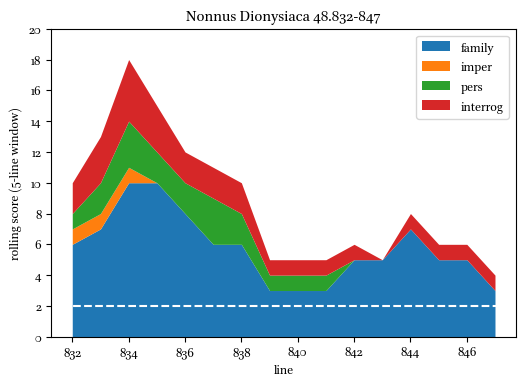

48.832
48.833
48.834
48.835
48.836
48.837
48.838
48.839
48.840
48.841
48.842


In [56]:
speech_id = "3669"

if BOOK_EXPORT:
    file = os.path.join(local_figs, "Fig_4-Artemis_to_Aura.pdf")
    plotAndText(speech_id, file)

else:
    plotAndText(speech_id)

#### Euryalus' mother

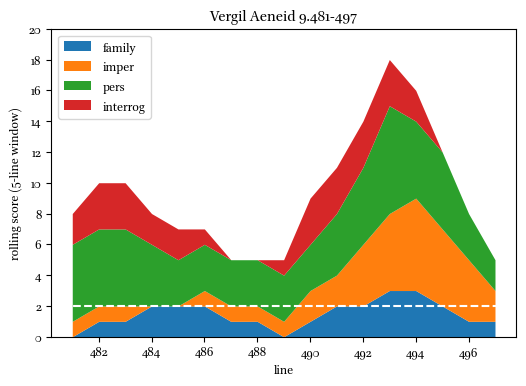

9.481
9.482
9.483
9.484
9.485
9.486
9.487
9.488
9.489
9.490
9.491


In [57]:
speech_id = "1758"

if BOOK_EXPORT:
    file = os.path.join(local_figs, "Fig_3-Mother_of_Euryalus.pdf")
    plotAndText(speech_id, file)

else:
    plotAndText(speech_id)

#### Creon to Menoeceus

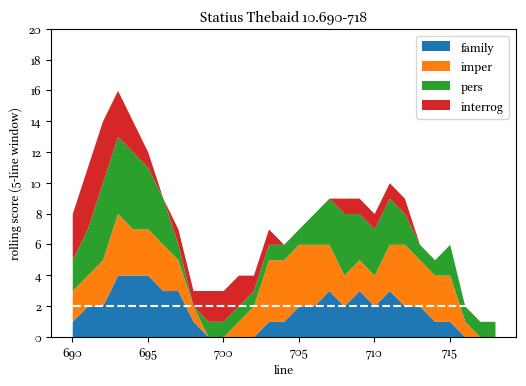

10.690
10.691
10.692
10.693
10.694
10.695
10.696
10.697
10.698
10.699
10.700


In [58]:
plotAndText('3216')

#### Hecuba to Hector

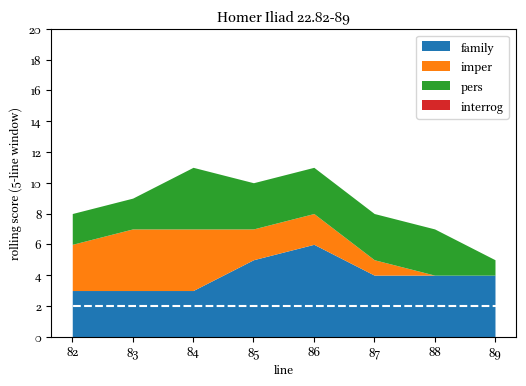

22.82
22.83
22.84
22.85
22.86
22.87
22.88
22.89


In [59]:
plotAndText('582')

#### Mary to Jesus

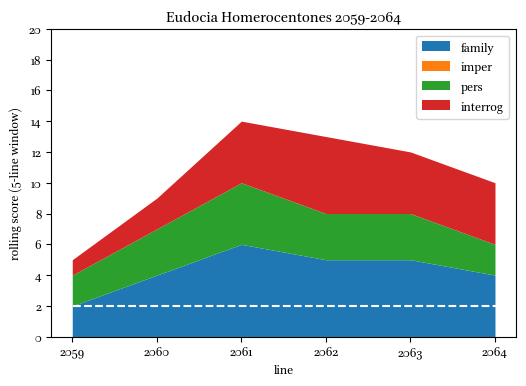

2059
2060
2061
2062
2063
2064


In [60]:
speech_id = "4553"

if BOOK_EXPORT:
    file = os.path.join(local_figs, "Fig_5-Mary_to_Jesus.pdf")
    plotAndText(speech_id, file)

else:
    plotAndText(speech_id)

#### Mother donkey

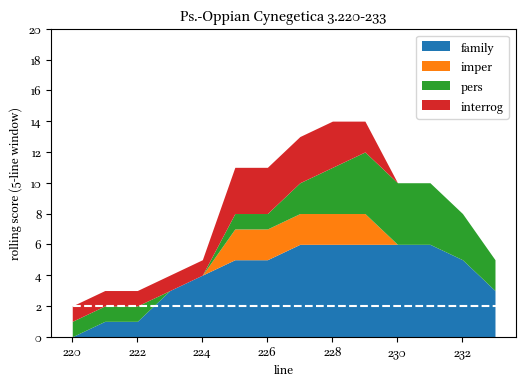

3.220
3.221
3.222
3.223
3.224
3.225
3.226
3.227
3.228
3.229
3.230


In [61]:
speech_id = "4319"

if BOOK_EXPORT:
    file = os.path.join(local_figs, "Fig_6-Mother_donkey.pdf")
    plotAndText(speech_id, file)

else:
    plotAndText(speech_id)

#### Iris-Nyx

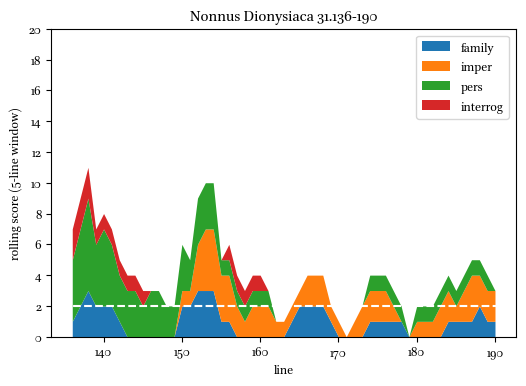

31.136
31.137
31.138
31.139
31.140
31.141
31.142
31.143
31.144
31.145
31.146


In [62]:
speech_id = "3501"

if BOOK_EXPORT:
    file = os.path.join(local_figs, "Fig_7-Iris-Nyx_to_Hypnus.pdf")
    plotAndText(speech_id, file)

else:
    plotAndText(speech_id)

#### Venus-huntress

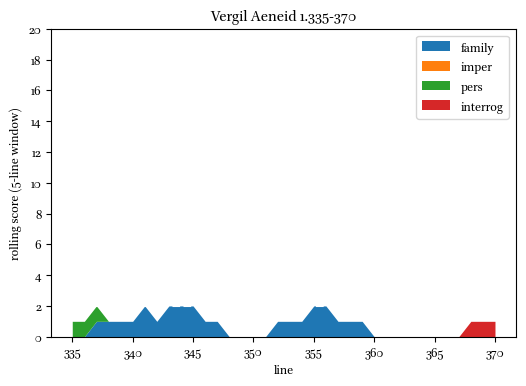

1.335
1.336
1.337
1.338
1.339
1.340
1.341
1.342
1.343
1.344
1.345


In [63]:
speech_id = "1538"

if BOOK_EXPORT:
    file = os.path.join(local_figs, "Fig_8-Venus-huntress_to_Aeneas.pdf")
    plotAndText(speech_id, file)

else:
    plotAndText(speech_id, file)